<a href="https://colab.research.google.com/github/whitestones011/deep_learning/blob/master/nn_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single layer neural network

$$ y = f(w_1 x_1 + w_2 x_2 + b) $$

$$ y = f\left(\sum_i w_i x_i + b\right) $$

In [ ]:
# !pip install torch torchvision

In [1]:
import torch

In [2]:
print(torch.__version__)

2.0.1+cu118


In [3]:
def sigmoid_activation(x):
  return 1 / (1 + torch.exp(-x))

Generate data

In [ ]:
torch.manual_seed(42)

In [ ]:
feat = torch.rand(1,5)

In [ ]:
weights = torch.rand_like(feat)

In [ ]:
bais = torch.randn(1,1)

Perceptron

In [ ]:
sigmoid_activation(torch.sum(feat*weights) + bais)

tensor([[0.9157]])

Reshaping weights matrix

In [ ]:
sigmoid_activation(torch.mm(feat, weights.view(5,1)) + bais)

tensor([[0.9157]])

# Multiple layer neural network

In [ ]:
# Define shape of NN
n_input = feat.shape[1]
n_hidden = 2
n_output = 1

In [ ]:
# Weight from input to hidden layer - random numbers from a normal distribution
w1 = torch.randn(n_input, n_hidden)
w1

tensor([[-0.4220, -1.3323],
        [-0.3639,  0.1513],
        [-0.3514, -0.7906],
        [-0.0915,  0.2352],
        [ 2.2440,  0.5817]])

In [ ]:
# Weight from hidden to output layer - random numbers from a normal distribution
w2 = torch.randn(n_hidden, n_output)
w2

tensor([[0.4528],
        [0.6410]])

In [ ]:
# Bias for hidden and output layers
b1 = torch.randn(1,n_hidden)
b2 = torch.randn(1,n_output)

In [ ]:
# Calculate hidden layer
h = sigmoid_activation(torch.mm(feat,w1) + b1)
h

tensor([[0.6150, 0.4182]])

In [ ]:
# Calculate output layer
sigmoid_activation(torch.mm(h,w2) + b2)

tensor([[0.6504]])

# MNIST

MNIST dataset consists of 28x28 pixel images of greyscale handwritten digits.

In [4]:
import matplotlib.pyplot as plt

In [5]:
from torchvision import datasets, transforms

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('/content/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [7]:
# Get a batch of training data
images, labels = next(iter(trainloader))

In [8]:
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


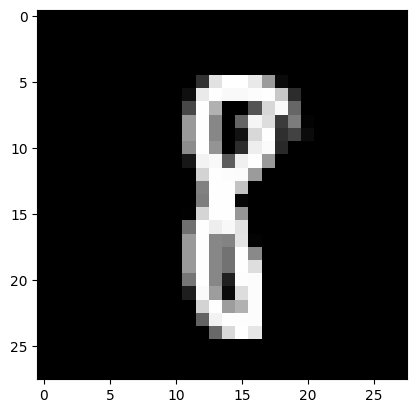

In [126]:
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r');

In [11]:
images[0].shape

torch.Size([1, 28, 28])

In [18]:
# Flatten the images
images_input = images.view(images.shape[0], -1)

In [19]:
images_input.shape

torch.Size([64, 784])

To predict the probability of each digit, set the size of output layer as 10.

In [20]:
# Define shape of NN
n_input = images_input.shape[1]
n_hidden = 256
n_output = 10

In [22]:
w1 = torch.randn(n_input, n_hidden)
w2 = torch.randn(n_hidden, n_output)

b1 = torch.randn(1,n_hidden)
b2 = torch.randn(1,n_output)

In [24]:
hidden_layer = sigmoid_activation(torch.mm(images_input, w1) + b1)

output_layer = sigmoid_activation(torch.mm(hidden_layer, w2) + b2)

To convert the output into probability distribution, use softmax function.

$$ \Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}} $$

In [62]:
def softmax(x):
  """
  Args:
    x (torch.Tensor): Pytorch tensor of shape (batch_size, n_output)
  Returns:
    The probability distribution.
  """
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

In [107]:
probas = softmax(output_layer)

In [108]:
# Check probabilities sum up to 1
torch.sum(probas, dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

# Model

In [119]:
from torch import nn
import torch.nn.functional as F

In [120]:
class MNIST_Classifier(nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        super().__init__()

        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(n_input, n_hidden)

        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(n_hidden, n_output)

    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))

        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)

        return x

In [121]:
model = MNIST_Classifier(n_input, n_hidden, n_output)